In [28]:
import numpy as np
import pandas as pd
from pathlib import Path

'''
Exercise A

'''

# Read CSV path into memory
CORONA_CSV_PATH = Path('../models/ex1/Corona_NLP_train.csv')

# Load csv into memory with pandas
file = pd.read_csv(CORONA_CSV_PATH, encoding='utf8', encoding_errors='ignore')


def remove_characters(s: str) -> str:
    """Remove special characters; replacing space with '_'"""
    # Filter non-alpha-numeric characters
    f = lambda ss: ''.join(filter(str.isalnum, ss)).lower()
    # Split to each word by space, apply lamda, join words with '_'
    return '_'.join(map(f, s.split(' ')))


# Apply remove_characters function to 'OriginalTweet' column
tweets = file['OriginalTweet'].apply(remove_characters)
tweets

0        menyrbie_philgahan_chrisitv_httpstcoifz9fan2pa...
1        advice_talk_to_your_neighbours_family_to_excha...
2        coronavirus_australia_woolworths_to_give_elder...
3        my_food_stock_is_not_the_only_one_which_is_emp...
4        me_ready_to_go_at_supermarket_during_the_covid...
                               ...                        
41152    airline_pilots_offering_to_stock_supermarket_s...
41153    response_to_complaint_not_provided_citing_covi...
41154    you_know_its_getting_tough_when_kameronwilds__...
41155    is_it_wrong_that_the_smell_of_hand_sanitizer_i...
41156    tartiicat_well_newused_rift_s_are_going_for_70...
Name: OriginalTweet, Length: 41157, dtype: object

In [29]:
'''
Exercise B

'''

# lowercase letters, including '_'
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
           'w', 'x', 'y', 'z', '_']

# Dict, counting the occurrence of each character
master_counter = dict()


def aggregate_chars(row: str, counter: dict, letter: str):
    """
    Aggregates the current count of the character in a given row in a dict.
    :param row: the current row, containing a tweet.
    :param counter: the dictionary accumulating the results (ex. master_counter).
    :param letter: the letter that is currently observed / counted.
    :return: void
    """
    try:
        # Try to append an existing key
        counter[letter] += row.count(letter)
    except KeyError:
        # Create a key, if it is non-existent.
        counter[letter] = row.count(letter)


# apply the aggregate_chars function to every row with every letter in master_counter.
for letter in letters:
    tweets.apply(aggregate_chars, args=[master_counter, letter])

master_counter

{'a': 484678,
 'b': 86687,
 'c': 273094,
 'd': 233577,
 'e': 682684,
 'f': 124833,
 'g': 146151,
 'h': 260617,
 'i': 467656,
 'j': 16877,
 'k': 82435,
 'l': 243865,
 'm': 163932,
 'n': 421802,
 'o': 575483,
 'p': 205895,
 'q': 13010,
 'r': 439469,
 's': 469626,
 't': 549574,
 'u': 210165,
 'v': 112124,
 'w': 105700,
 'x': 16856,
 'y': 125475,
 'z': 16401,
 '_': 1207045}

In [30]:
# sum the values of master_counter to get the total number of characters in the dataset.
total_letters = sum(master_counter.values())

# this variable holds the probability of each character occurrence.
probabilities = dict()

# iterate over every key (letter) - value (# counted) with the total letter occurrence to determine the probability of
# a character occurrence.
for key, value in master_counter.items():
    # ex. key = a, value = 50, total_letters = 100 => probabilities['a'] = value / total letters = 0.5
    probabilities[key] = value / total_letters

# test, if it sums to 1.0
sum(probabilities.values())

1.0

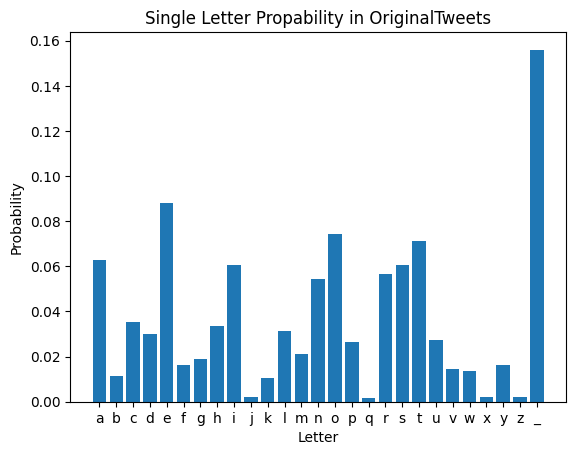

In [31]:
# Plotting the results
import matplotlib.pylab as plt

# Plot the probability of each letter in a bar.
plt.bar(probabilities.keys(), probabilities.values())

# Annotations
plt.xlabel('Letter')
plt.ylabel('Probability')
plt.title('Single Letter Propability in OriginalTweets')
plt.show()

# Interpretation

The highest probabilities have the characters: `_`, `e`, `o`, `t`, and `a`.
The lowest probabilities have the characters: `j`, `q`, `x`, and `z`.

This is expected due to the most frequently used words containing those letters, see https://1000mostcommonwords.com/1000-most-common-english-words/.

Furthermore, vowels are expected to be highly frequent in the english language.

However, to explain the usage of the letter `t`, words like _the_, _that_, _to_, _they_, ... That are exceptionally commonly used contain them at least once.


In [32]:
'''
Exercise C

'''

# perform a cross merge between two instances of `letter` to create the ordered letter-pairs, ex. [aa, ab, ..., zz]
cross_keys = pd.merge(pd.DataFrame(letters), pd.DataFrame(letters), how='cross')

# sum up all characters in all tweets, with an offset of n-1 per tweet.
total_number_of_letters_in_all_tweets = sum(list(map(lambda s: len(s) - 1, tweets)))

# create a probability matrix with default value 0.0
arr = np.zeros((27, 27))

# fill the matrix with probabilities
for ii, i in enumerate(letters):
    for ij, j in enumerate(letters):
        tag = i + j  # the combination of letters
        total_occurance = 0  # total occurrence of letter-pair in all tweets
        for tweet in tweets:  # iterate over all tweets and count
            total_occurance += tweet.count(tag)
        # save the result in the probability matrix
        arr[ii][ij] = total_occurance / total_number_of_letters_in_all_tweets

arr

array([[8.90219009e-05, 1.22331674e-03, 2.20766651e-03, 1.73279789e-03,
        6.84587359e-05, 9.33133441e-04, 1.04667787e-03, 1.74850764e-04,
        2.00305663e-03, 1.06775192e-04, 1.17095091e-03, 5.69050470e-03,
        2.23231676e-03, 1.15670997e-02, 7.62497487e-05, 1.40531991e-03,
        4.59797480e-05, 7.22265208e-03, 4.40473213e-03, 5.92180837e-03,
        8.68506350e-04, 4.26602656e-03, 3.03594058e-04, 1.02049496e-04,
        2.29694385e-03, 2.19425575e-04, 4.17968681e-03],
       [1.16558661e-03, 1.24656206e-04, 1.51860890e-04, 4.49579758e-05,
        2.59491816e-03, 3.14194944e-05, 3.06531653e-05, 5.44093684e-05,
        6.18683053e-04, 4.15094947e-05, 2.77155703e-05, 1.02036724e-03,
        3.93382288e-05, 4.22758238e-05, 1.05012635e-03, 3.55065832e-05,
        2.87373425e-05, 7.65690525e-04, 2.73324057e-04, 8.60843059e-05,
        1.66561637e-03, 4.04877225e-05, 3.51234186e-05, 2.77155703e-05,
        5.60186596e-04, 3.16749375e-05, 2.40627348e-04],
       [3.25153451e-03

In [33]:
np.sum(arr)  # not == 1.0 probably due to rounding errors

0.9732496212418261

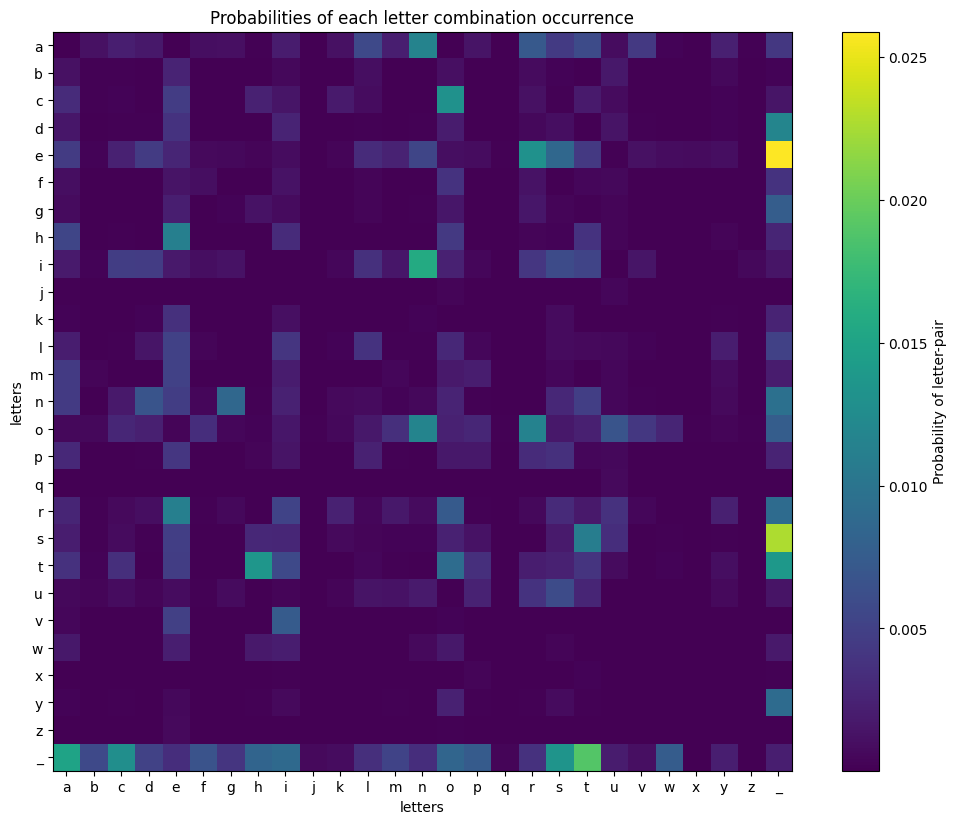

In [34]:
# plot the results

import numpy as np

plt.figure(figsize=[6.4 * 2, 4.8 * 2])

heatmap = plt.imshow(arr, interpolation='nearest')

plt.xticks(np.arange(27), letters)
plt.yticks(np.arange(27), letters)

plt.colorbar(heatmap, label='Probability of letter-pair')
plt.title('Probabilities of each letter combination occurrence')

plt.ylabel('letters')
plt.xlabel('letters')

plt.show()

## Interpretation

Ordered pairs with the highest probabilities: `e_` `s_` `_t` `in` `co` `th`. In general, pairs ending/beginning with spaces have higher probabilities.
Lowest probabilities: Pairs that start with x,z,j and end with b,x,z,q.

We can see a correlation between the exercise b) and c): characters that have lower probabilities "alone" have low probabilities in pairs.

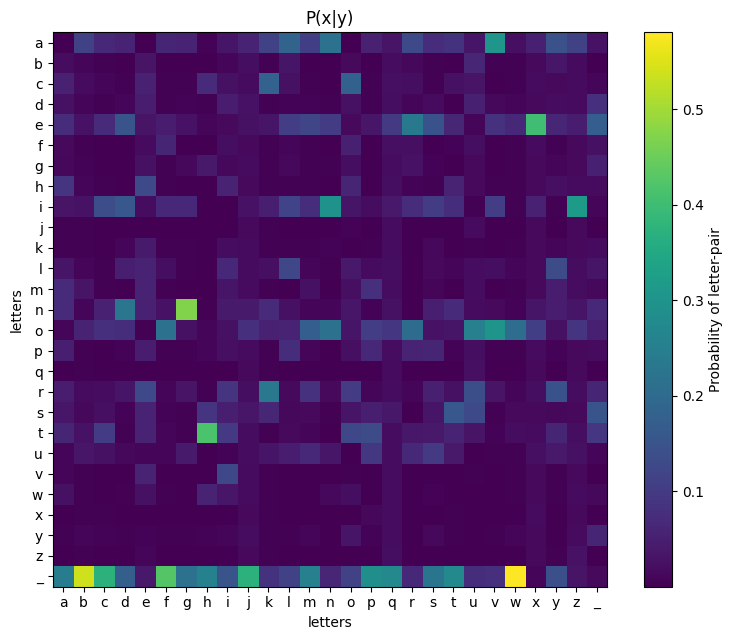

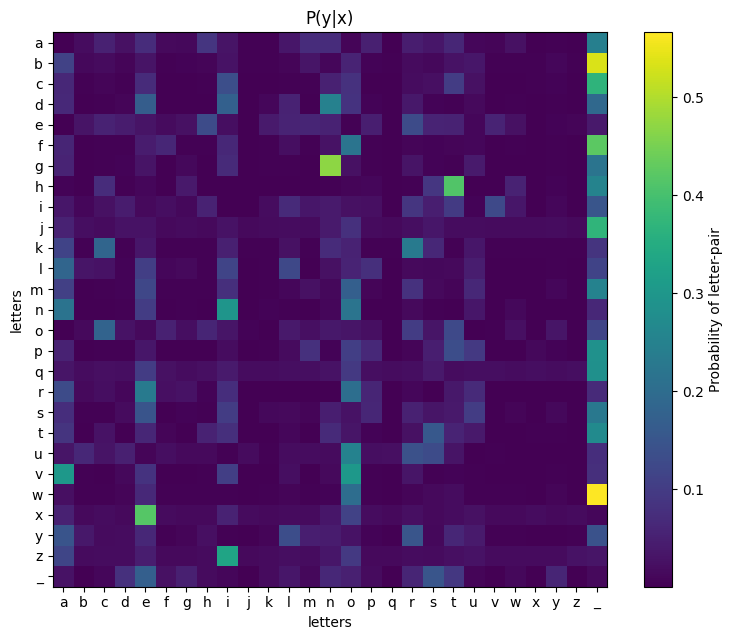

In [37]:
'''
Exercise D

'''

# P(X|Y)
x_conditional_y = arr / np.sum(arr, axis=0, keepdims=True)

plt.figure(figsize=[6.4 * 1.5, 4.8 * 1.5])
heatmap = plt.imshow(x_conditional_y, interpolation='nearest')
plt.title("P(x|y)")
plt.xticks(np.arange(27), letters)
plt.yticks(np.arange(27), letters)
plt.colorbar(heatmap, label='Probability of letter-pair')

plt.ylabel('letters')
plt.xlabel('letters')
plt.show()

# P(Y|X)
y_conditional_x = arr.T / np.sum(arr, axis=1, keepdims=True)

plt.figure(figsize=[6.4 * 1.5, 4.8 * 1.5])
heatmap = plt.imshow(y_conditional_x, interpolation='nearest')
plt.title("P(y|x)")
plt.xticks(np.arange(27), letters)
plt.yticks(np.arange(27), letters)
plt.colorbar(heatmap, label='Probability of letter-pair')

plt.ylabel('letters')
plt.xlabel('letters')
plt.show()

## Interpretation
No, P(x|y) and P(y|x) are not identical. In the distribution P(x|y=w), we can see that the highest probabilities are for x=_ and x=o. This is expected since P(w) itself is very low but it occurs with a non-zero probability following _ and o in the joint distribution. Which means given y=w, x=_ or x=o is most probable.

Similarly, distribution P(y|x=_ ) has low probabilities since spaces are so common that probability of specific character occurring given x=_ is also low.

In [39]:
'''
Exercise E

'''

# Store the "independent" statements
independence_statements: [bool] = []

for v in cross_keys.values:
    [a, b] = v

    # use the probability of each character
    a_prob = probabilities[a]
    b_prob = probabilities[b]
    prob = a_prob * b_prob

    # use the probability of the pair
    a_index = letters.index(a)
    b_index = letters.index(b)
    bigram_prob = arr[a_index][b_index]

    # Save the test for independence
    independence_statements.append(bigram_prob == prob)


In [41]:
# Assert, that every combination is independent (all need to satisfy the requirement and therefore be 'True')
all(independence_statements)

False

## Interpretation

### Intuition

TODO:

### Result

No, they are not independent.
